# Image Multiclass Classification Project

In [1]:
import pandas as pd # data analiz kütüphanesi, satır ve sütun tablosu
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # istatistik analizi
import random
import os # sistem taskleri yerine getirmek için (götüntüleme, ekleme çıkarma gibi.)
import glob #belirli uzantılı dosyaları bulmak için
import cv2 # görüntü işleme, görüntü getirme vb.

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam

# Veri kümesi oluşturma

In [2]:
main_path = ""
train_path = os.path.join(main_path,"data")

In [3]:
train_tsirts = glob.glob(train_path+"/tsirts/*.jpg")
train_sweatshirt = glob.glob(train_path+"/sweatshirt/*.jpg")
train_pants = glob.glob(train_path+"/pants/*.jpg")

In [4]:
#Loop a sokup, yukarıda görülen bütün .jpg dosyalarını listeliyoruz :
train_list = [x for x in train_tsirts]
train_list.extend([x for x in train_sweatshirt])
train_list.extend([x for x in train_pants])

#satır ve sütun tablosu
df_train = pd.DataFrame(np.concatenate([
                       ['0']*len(train_tsirts),
                       ['1']*len(train_sweatshirt),
                       ['2']*len(train_pants)]),
                    columns = ['label'])
df_train['image'] = [x for x in train_list]

In [5]:
df_train

,label,image
0,0,data/tsirts\-.jpg
1,0,data/tsirts\-2.jpg
2,0,data/tsirts\-com-fruit-of-the-loom-sleeve-t-sh...
3,0,data/tsirts\-din-t-shirt-med-dit-egen-oploadet...
4,0,data/tsirts\-faintest-idea-flying-the-japanese...
...,...,...
3967,2,data/pants\_57.JPG2.jpg
3968,2,data/pants\_57.JPG3.jpg
3969,2,data/pants\_57.JPG4.jpg
3970,2,data/pants\_57.JPG6.jpg


# Önişleme

In [6]:
path = ''
img_list = list(df_train['image'])
data_img = [] #oluşturulan array adı
for each in img_list:
    each_path = os.path.join(path, each)# 3 dosya yolu için
    print(each_path)
    each_img = cv2.imread(each_path) # her resim için
    each_img = cv2.cvtColor(each_img, cv2.COLOR_BGR2RGB) # rgb renklerine dönüştürme (resimler 3 depth kazanır)
    each_img_resized = cv2.resize(each_img, (128,128)) # resimlerin boyutu 128
    data_img.append(each_img_resized) # boyutları ve renkleri değişmiş bütün resimler liste haline getirilir
    
X = np.array(data_img) # oluşturulan liste NumPy array'e dönüştürülür.


data/tsirts\-.jpg
data/tsirts\-2.jpg
data/tsirts\-com-fruit-of-the-loom-sleeve-t-shirts-5abde166662934.3573392215223934464185.jpg
data/tsirts\-din-t-shirt-med-dit-egen-oploadet-bil-5b67d9f982e579.1352946415335326655362.jpg
data/tsirts\-faintest-idea-flying-the-japanese-flag-png-favpng-PjWP5wrwWfYCC3B1A9CrwTPPd.jpg
data/tsirts\0.jpg
data/tsirts\000-impressive-t-shirt-design-template-ai-example-1920_1884.jpg
data/tsirts\0009695241_10.jpg
data/tsirts\0009695241_102.jpg
data/tsirts\0018_E.jpg
data/tsirts\0018_E2.jpg
data/tsirts\003-unforgettable-t-shirt-template-vector-high-resolution-1920_1012.jpg
data/tsirts\008-sensational-plain-t-shirt-template-ideas-868_620.jpg
data/tsirts\009-awful-t-shirt-design-template-photoshop-inspirations-1920_987.jpg
data/tsirts\009-beautiful-blank-tee-shirt-template-high-resolution-1920_1372.jpg
data/tsirts\02.jpg
data/tsirts\03.jpg
data/tsirts\032.jpg
data/tsirts\03512f1f3d68802664cb765f4f59fed4-1-600x600.jpg
data/tsirts\04326.jpg
data/tsirts\051f9c1db6622a8

In [7]:
print('Shape of X: ', X.shape) # NumPy dizininde 3972 adet resim bulunuyor ve resimler 128x128 ve 3 derinlikte

Shape of X:  (3972, 128, 128, 3)


In [8]:
y = OneHotEncoder(dtype='int8', sparse=False).fit_transform(df_train['label'].values.reshape(-1,1))

c:\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
print('Shape of y: ', y.shape)

Shape of y:  (3972, 3)


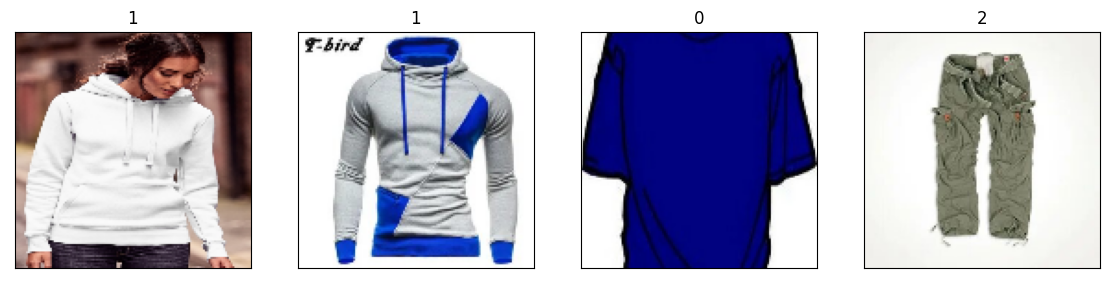

In [10]:
indices = np.random.randint(0,3972,4)
i = 1
plt.figure(figsize=(14,7))
for each in indices:
    plt.subplot(2,4,i)
    plt.imshow(X[each])
    plt.title(df_train['label'].loc[each])
    plt.xticks([])
    plt.yticks([])
    i += 1

# Görüntü Sınıflandırma

In [11]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_val shape  : ', X_val.shape)
print('y_val shape  : ', y_val.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)
#

X_train shape:  (2700, 128, 128, 3)
y_train shape:  (2700, 3)
X_val shape  :  (676, 128, 128, 3)
y_val shape  :  (676, 3)
X_test shape :  (596, 128, 128, 3)
y_test shape :  (596, 3)


In [12]:
#Data augmentation çünkü overfitting
train_gen = ImageDataGenerator(horizontal_flip=True,
                               rotation_range = 15,
                               #rescale=1./255,
                               zoom_range=0.2,
                               shear_range=0.1,
                               width_shift_range=0.1,
                               height_shift_range=0.1)
validation_gen = ImageDataGenerator(horizontal_flip=True,
                                    rotation_range = 15,
                                    #rescale=1./255,
                                    zoom_range=0.2,
                                    height_shift_range = 0.1,
                                    width_shift_range = 0.1)
train_gen.fit(X_train)
validation_gen.fit(X_val)

In [13]:
batch_size = 50
epochs = 4

In [14]:
base = Xception(include_top=False, 
                weights='imagenet', 
                input_shape=(128,128,3))
x = base.output
x = GlobalAveragePooling2D()(x) # 2B a dönüştürür

In [15]:
head = Dense(3, activation='softmax')(x)
model = Model(inputs=base.input, outputs=head)

In [16]:
model.compile(optimizer=Adam(lr=0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'], run_eagerly=True)

c:\python\python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                              

In [18]:
history = model.fit_generator(
               train_gen.flow(X_train, y_train,
               batch_size=batch_size),
               epochs = epochs,
               validation_data = validation_gen.flow(X_val, y_val)
)

Epoch 1/4


C:\Users\haluk\AppData\Local\Temp\ipykernel_6340\1878852343.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


54/54 [==============================] - 159s 3s/step - loss: 0.4575 - accuracy: 0.8563 - val_loss: 0.1985 - val_accuracy: 0.9231
Epoch 2/4
54/54 [==============================] - 160s 3s/step - loss: 0.0780 - accuracy: 0.9774 - val_loss: 0.0357 - val_accuracy: 0.9896
Epoch 3/4
54/54 [==============================] - 158s 3s/step - loss: 0.0233 - accuracy: 0.9956 - val_loss: 0.0131 - val_accuracy: 0.9956
Epoch 4/4
54/54 [==============================] - 161s 3s/step - loss: 0.0144 - accuracy: 0.9974 - val_loss: 0.0096 - val_accuracy: 0.9985


# Sonuçları analiz etme 

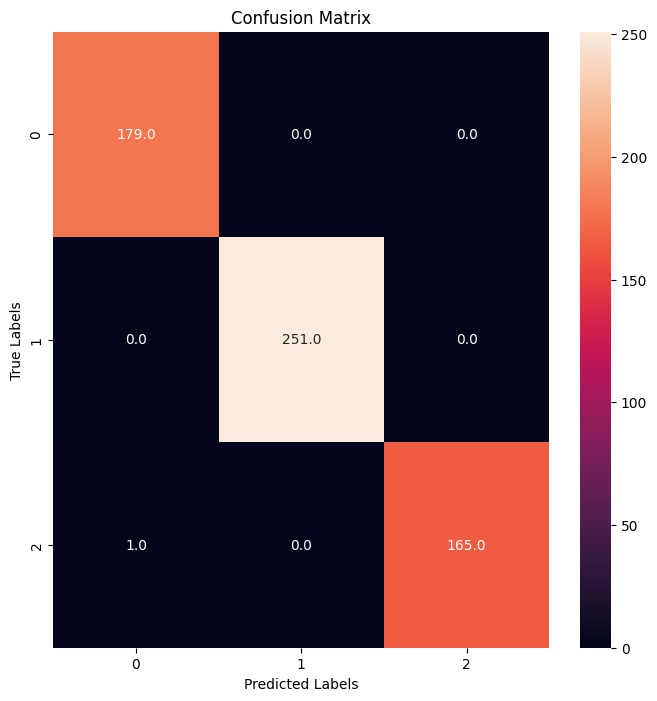

In [19]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_test_classes = np.argmax(y_test, axis = 1)
confmx = confusion_matrix(y_test_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

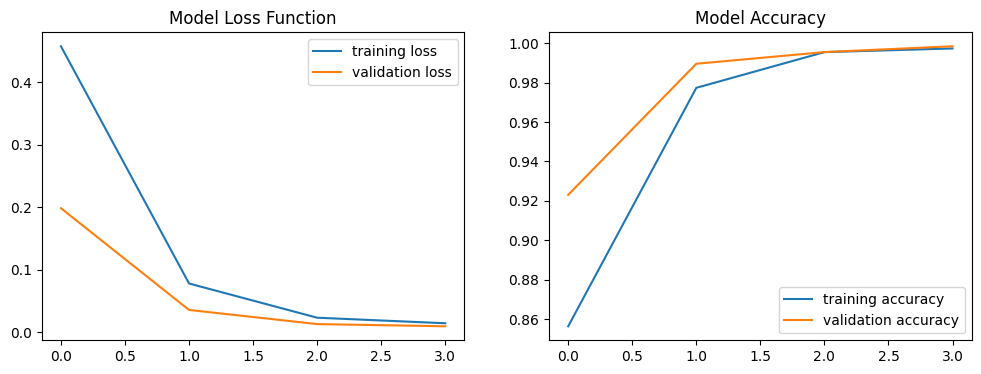

In [21]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_df['loss'], label='training loss')
plt.plot(history_df['val_loss'], label='validation loss')
plt.title('Model Loss Function')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(history_df['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.legend();

# Test

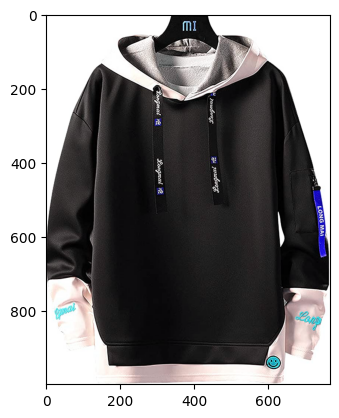

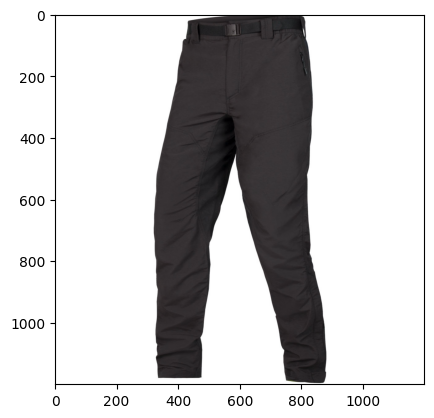

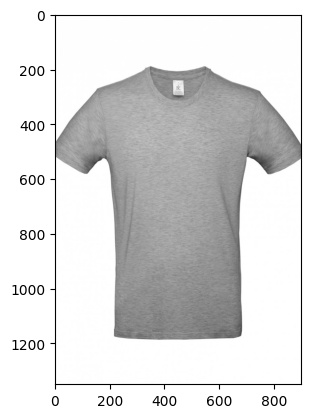

In [23]:
img = cv2.imread('sweat1.jpg')
plt.imshow(img)
plt.show()
img2 = cv2.imread('pant.jpg')
plt.imshow(img2)
plt.show()
img3 = cv2.imread('sirt.jpg')
plt.imshow(img3)
plt.show()

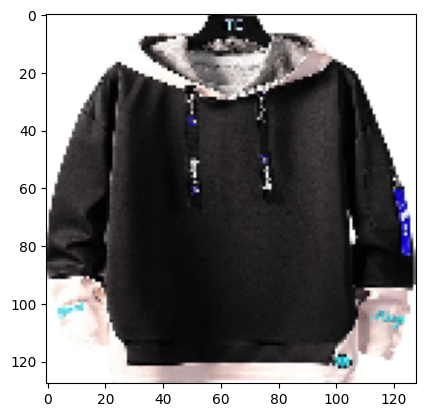

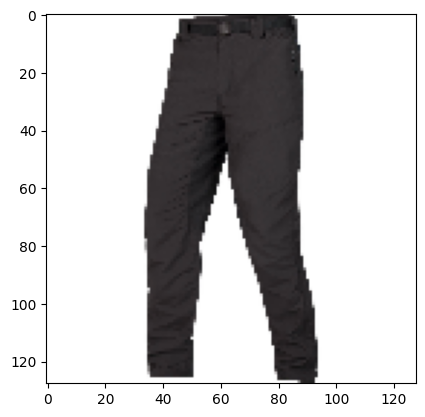

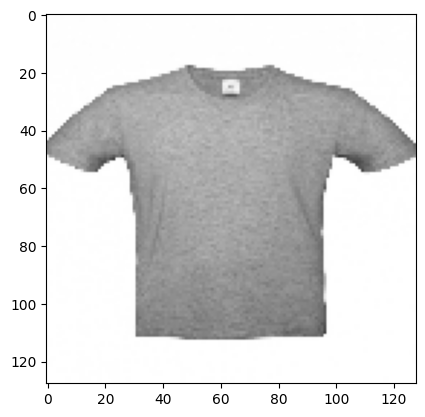

In [24]:
resize = tf.image.resize(img, (128,128))
plt.imshow(resize.numpy().astype(int))
plt.show()
resize2 = tf.image.resize(img2, (128,128))
plt.imshow(resize2.numpy().astype(int))
plt.show()
resize3 = tf.image.resize(img3, (128,128))
plt.imshow(resize3.numpy().astype(int))
plt.show()

In [27]:
denemesweat = model.predict(np.expand_dims(resize/1, 0))
denemepant = model.predict(np.expand_dims(resize2/1, 0))
denemetshirt = model.predict(np.expand_dims(resize3/1, 0))

In [28]:
print("    0:Tshirts    1:sweatshirts   2:Trousers \n\n", denemesweat, "\n", denemepant, "\n", denemetshirt, "\n")

    0:Tshirts    1:sweatshirts   2:Trousers 

 [[1.4322864e-05 9.9998164e-01 4.0316359e-06]] 
 [[2.4383706e-04 4.1547682e-04 9.9934071e-01]] 
 [[9.9960560e-01 1.6167168e-04 2.3276061e-04]] 



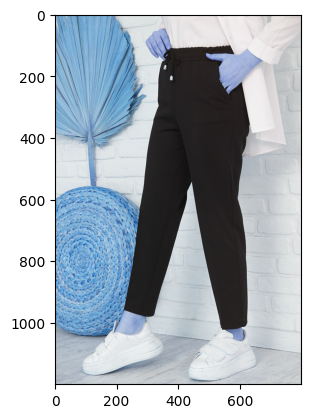

In [29]:
img4 = cv2.imread('pant22.jpg')
plt.imshow(img4)
plt.show()


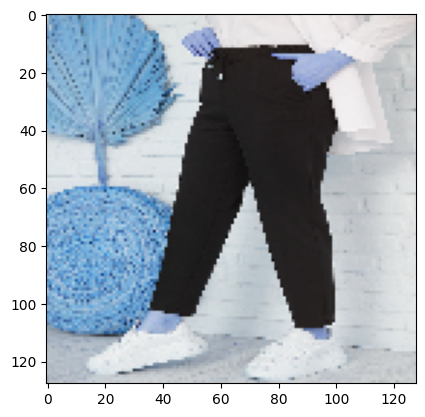

In [30]:
resize4 = tf.image.resize(img4, (128,128))
plt.imshow(resize4.numpy().astype(int))
plt.show()

In [31]:
kek = model.predict(np.expand_dims(resize4/1, 0))

In [32]:
kek

array([[1.7217008e-02, 8.6407660e-04, 9.8191893e-01]], dtype=float32)

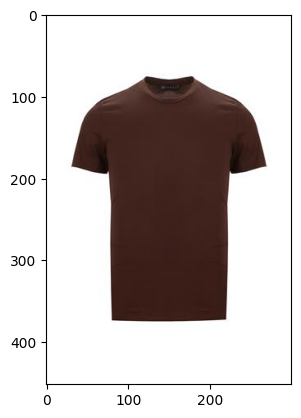

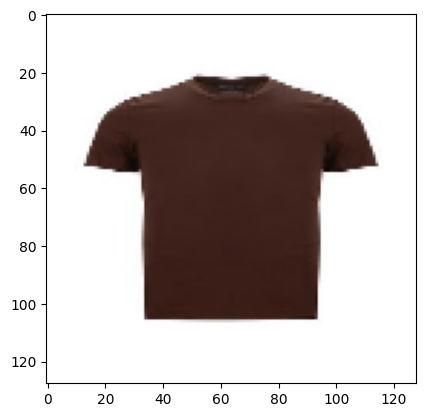

In [33]:
img5 = cv2.imread('sirt99.jpg')
plt.imshow(img5)
plt.show()
resize5 = tf.image.resize(img5, (128,128))
plt.imshow(resize5.numpy().astype(int))
plt.show()

kek2 = model.predict(np.expand_dims(resize5/1, 0))

In [34]:
kek2


array([[9.9945658e-01, 2.9792820e-04, 2.4542082e-04]], dtype=float32)

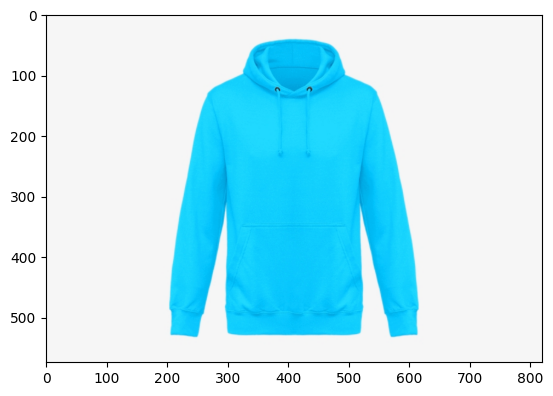

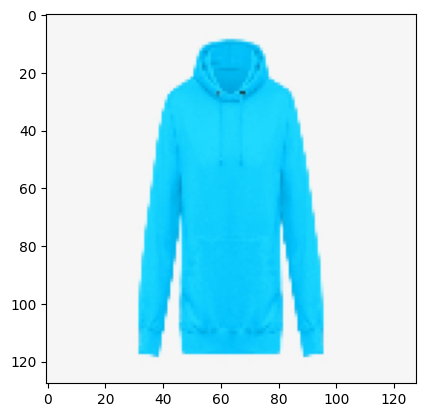

In [35]:
img6 = cv2.imread('sweat22.jpg')
plt.imshow(img6)
plt.show()
resize6 = tf.image.resize(img6, (128,128))
plt.imshow(resize6.numpy().astype(int))
plt.show()

kek6 = model.predict(np.expand_dims(resize6/1, 0))

In [36]:
kek6

array([[2.4291805e-04, 9.9952507e-01, 2.3199660e-04]], dtype=float32)

In [37]:
def rounder(a):
    return list(map(lambda x: str (x)[:5],a[0]))

In [38]:
rounder( kek6)

['0.000', '0.999', '0.000']